# ANZ virtaul experience program
## Challenge 2
#### Implement Predictive Analytics
Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### Analyzing the dataset

In [2]:
#Load excel into a pandas dataFrame.
train=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
train.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# No. of data-points and features
print (train.shape)

(12043, 23)


In [4]:
# The column names in our dataset
print (train.columns)

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


In [5]:
# No. of transactions present for each txn description type
train["txn_description"].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [6]:
# No. of customers
train["customer_id"].nunique()

100

### Preparing dataframe for salary related columns

In [7]:
# Extracting only salary transactions
salary=train.loc[train['txn_description'] == "PAY/SALARY"].copy()
salary.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [8]:
salary.shape

(883, 23)

In [9]:
salary['month'] = pd.to_datetime(salary['extraction']).dt.month
salary.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,8
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,8
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,8
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,8
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,8


In [10]:
# Dropping the columns
salary.drop(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'date', 'balance',
       'merchant_suburb', 'merchant_state', 'extraction',
       'transaction_id', 'country', 'merchant_long_lat',
       'movement'], axis=1, inplace=True)
salary.head()

,gender,age,amount,customer_id,month
50,M,23,3903.95,CUS-1462656821,8
61,F,23,1626.48,CUS-2500783281,8
64,M,22,983.36,CUS-326006476,8
68,M,24,1408.08,CUS-1433879684,8
70,F,43,1068.04,CUS-4123612273,8


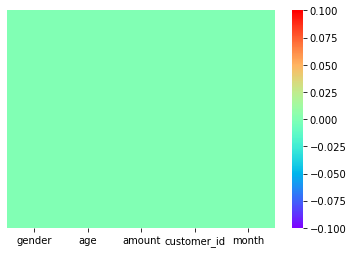

In [11]:
# Checking if any null values still exists
sns.heatmap(salary.isnull(),yticklabels=False,cbar=True,cmap="rainbow")

In [12]:
# Re-arranging the columns
salary=salary[['customer_id', 'month', 'gender', 'age', 'amount']]
salary.head()

,customer_id,month,gender,age,amount
50,CUS-1462656821,8,M,23,3903.95
61,CUS-2500783281,8,F,23,1626.48
64,CUS-326006476,8,M,22,983.36
68,CUS-1433879684,8,M,24,1408.08
70,CUS-4123612273,8,F,43,1068.04


In [13]:
salary=salary.groupby(['customer_id', 'gender', 'age', 'month'],as_index=False).sum()
salary.head()

,customer_id,gender,age,month,amount
0,CUS-1005756958,F,53,8,3881.88
1,CUS-1005756958,F,53,9,3881.88
2,CUS-1005756958,F,53,10,4852.35
3,CUS-1117979751,M,21,8,7157.30
4,CUS-1117979751,M,21,9,7157.30


**Observation(s):**

1) Every month the salary credited is different, so to find out annual salary we will take mean of the salary for 3 months and then multiple it by 12.

In [14]:
salary.shape

(296, 5)

In [15]:
salary.drop(['month'], axis=1, inplace=True)
salary.head()

,customer_id,gender,age,amount
0,CUS-1005756958,F,53,3881.88
1,CUS-1005756958,F,53,3881.88
2,CUS-1005756958,F,53,4852.35
3,CUS-1117979751,M,21,7157.30
4,CUS-1117979751,M,21,7157.30


In [16]:
salary=salary.groupby(['customer_id', 'gender', 'age'],as_index=False).mean()
salary.head()

,customer_id,gender,age,amount
0,CUS-1005756958,F,53,4205.370000
1,CUS-1117979751,M,21,8350.183333
2,CUS-1140341822,M,28,3833.020000
3,CUS-1147642491,F,34,7416.023333
4,CUS-1196156254,F,34,9108.703333


In [17]:
salary['amount'] = salary['amount'].multiply(12)
salary.head()

,customer_id,gender,age,amount
0,CUS-1005756958,F,53,50464.44
1,CUS-1117979751,M,21,100202.20
2,CUS-1140341822,M,28,45996.24
3,CUS-1147642491,F,34,88992.28
4,CUS-1196156254,F,34,109304.44


In [18]:
salary.rename(columns = {'amount':'annual_salary'}, inplace = True) 
salary.head()

,customer_id,gender,age,annual_salary
0,CUS-1005756958,F,53,50464.44
1,CUS-1117979751,M,21,100202.20
2,CUS-1140341822,M,28,45996.24
3,CUS-1147642491,F,34,88992.28
4,CUS-1196156254,F,34,109304.44


In [19]:
# One hot encoding for gender
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
salary['gender']= le.fit_transform(salary['gender']) 
salary.head()

,customer_id,gender,age,annual_salary
0,CUS-1005756958,0,53,50464.44
1,CUS-1117979751,1,21,100202.20
2,CUS-1140341822,1,28,45996.24
3,CUS-1147642491,0,34,88992.28
4,CUS-1196156254,0,34,109304.44


In [20]:
salary.shape

(100, 4)

### 2-D Scatter Plot

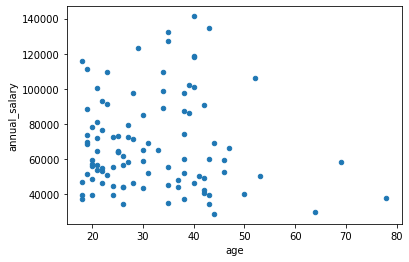

In [21]:
#2-D scatter plot:
salary.plot(kind='scatter', x='age', y='annual_salary')
plt.show()

**Observation(s):**

1) People in the age range of 20-40 had more transactions pertaining to salary as compared to the people of other age group.

2) People in the age range of 50-80 do not receive annual salary above 60000.

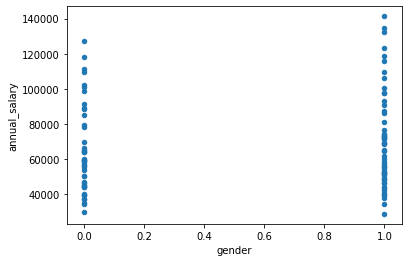

In [22]:
#2-D scatter plot:
salary.plot(kind='scatter', x='gender', y='annual_salary')
plt.show()

**Observation(s):**

1) The highest annual salary of females is less than the highest annual salary of males.

Note: Female - 0    Male - 1

### Separating features

In [23]:
#separating the features (x1,x2) and the output feature(y)
x=salary.drop(["annual_salary","customer_id"],axis=1)
x.head()

,gender,age
0,0,53
1,1,21
2,1,28
3,0,34
4,0,34


In [24]:
y=salary["annual_salary"]
y.head()

0     50464.44
1    100202.20
2     45996.24
3     88992.28
4    109304.44
Name: annual_salary, dtype: float64

### Split into training and test data

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [26]:
x_train.shape

(70, 2)

In [27]:
x_test.shape

(30, 2)

### Training the model (Linear regression)

In [28]:
#import linear regression
from sklearn.linear_model import LinearRegression
#call the linear regression function
model=LinearRegression()

In [29]:
#train the model
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#predict the test data
pred=model.predict(x_test)

In [31]:
#gives the value of y
pred

array([71660.38997581, 73069.9274714 , 73774.6962192 , 62553.96924011,
       72981.83137793, 62465.87314664, 63611.12236181, 71396.10169539,
       71924.67825623, 61320.62393147, 72188.96653666, 71572.29388234,
       72629.44700403, 72188.96653666, 62553.96924011, 61584.91221189,
       71572.29388234, 73158.02356488, 61849.20049231, 61761.10439884,
       71836.58216276, 71660.38997581, 72277.06263013, 62906.35361401,
       71660.38997581, 72981.83137793, 76593.77121039, 72453.25481708,
       73598.50403225, 73422.3118453 ])

In [32]:
len(pred)

30

In [33]:
#printing the coefficients of"y=b0+b1x1+b2x2+b3x3"
print(model.coef_)

[10251.66995087    88.09609347]


In [34]:
#printing the intercept
print(model.intercept_)

59470.60596849892


### Checking the accuracy of the model

In [35]:
from sklearn.metrics import r2_score,adjusted_rand_score

In [36]:
r_squared=r2_score(pred,y_test)
r_squared

-28.406208945397957

**Observation(s):**

1) The accuracy is very poor and it should not be applied to segment customers into income brackets.

### Training model (decision tree)

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dtree=DecisionTreeRegressor()

In [39]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
pred1=dtree.predict(x_test)

In [41]:
pred1

array([ 64964.88      ,  71011.7       ,  69296.16      ,  44873.4       ,
        71011.7       , 103898.76      ,  59290.8       ,  60011.18      ,
        64508.4       ,  55295.34      ,  71083.04      ,  81130.4       ,
        69276.48      ,  71083.04      ,  44873.4       ,  44550.72      ,
        81130.4       ,  71011.7       ,  58363.44      ,  44214.72      ,
        39426.24      ,  64964.88      ,  71083.04      ,  36986.88      ,
        64964.88      ,  71011.7       ,  58414.72      ,  69276.48      ,
        69296.16      ,  57673.54666667])

### Checking the accuracy of the model

In [42]:
r_squared=r2_score(pred1,y_test)
r_squared

-3.186217455909331

**Observation(s):**

1) The accuracy is better than linear regression but still it is very poor.

### Visualization

In [43]:
#!pip install pydot

In [44]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

D:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [45]:
features=list(x.columns[:])
features

['gender', 'age']

In [46]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

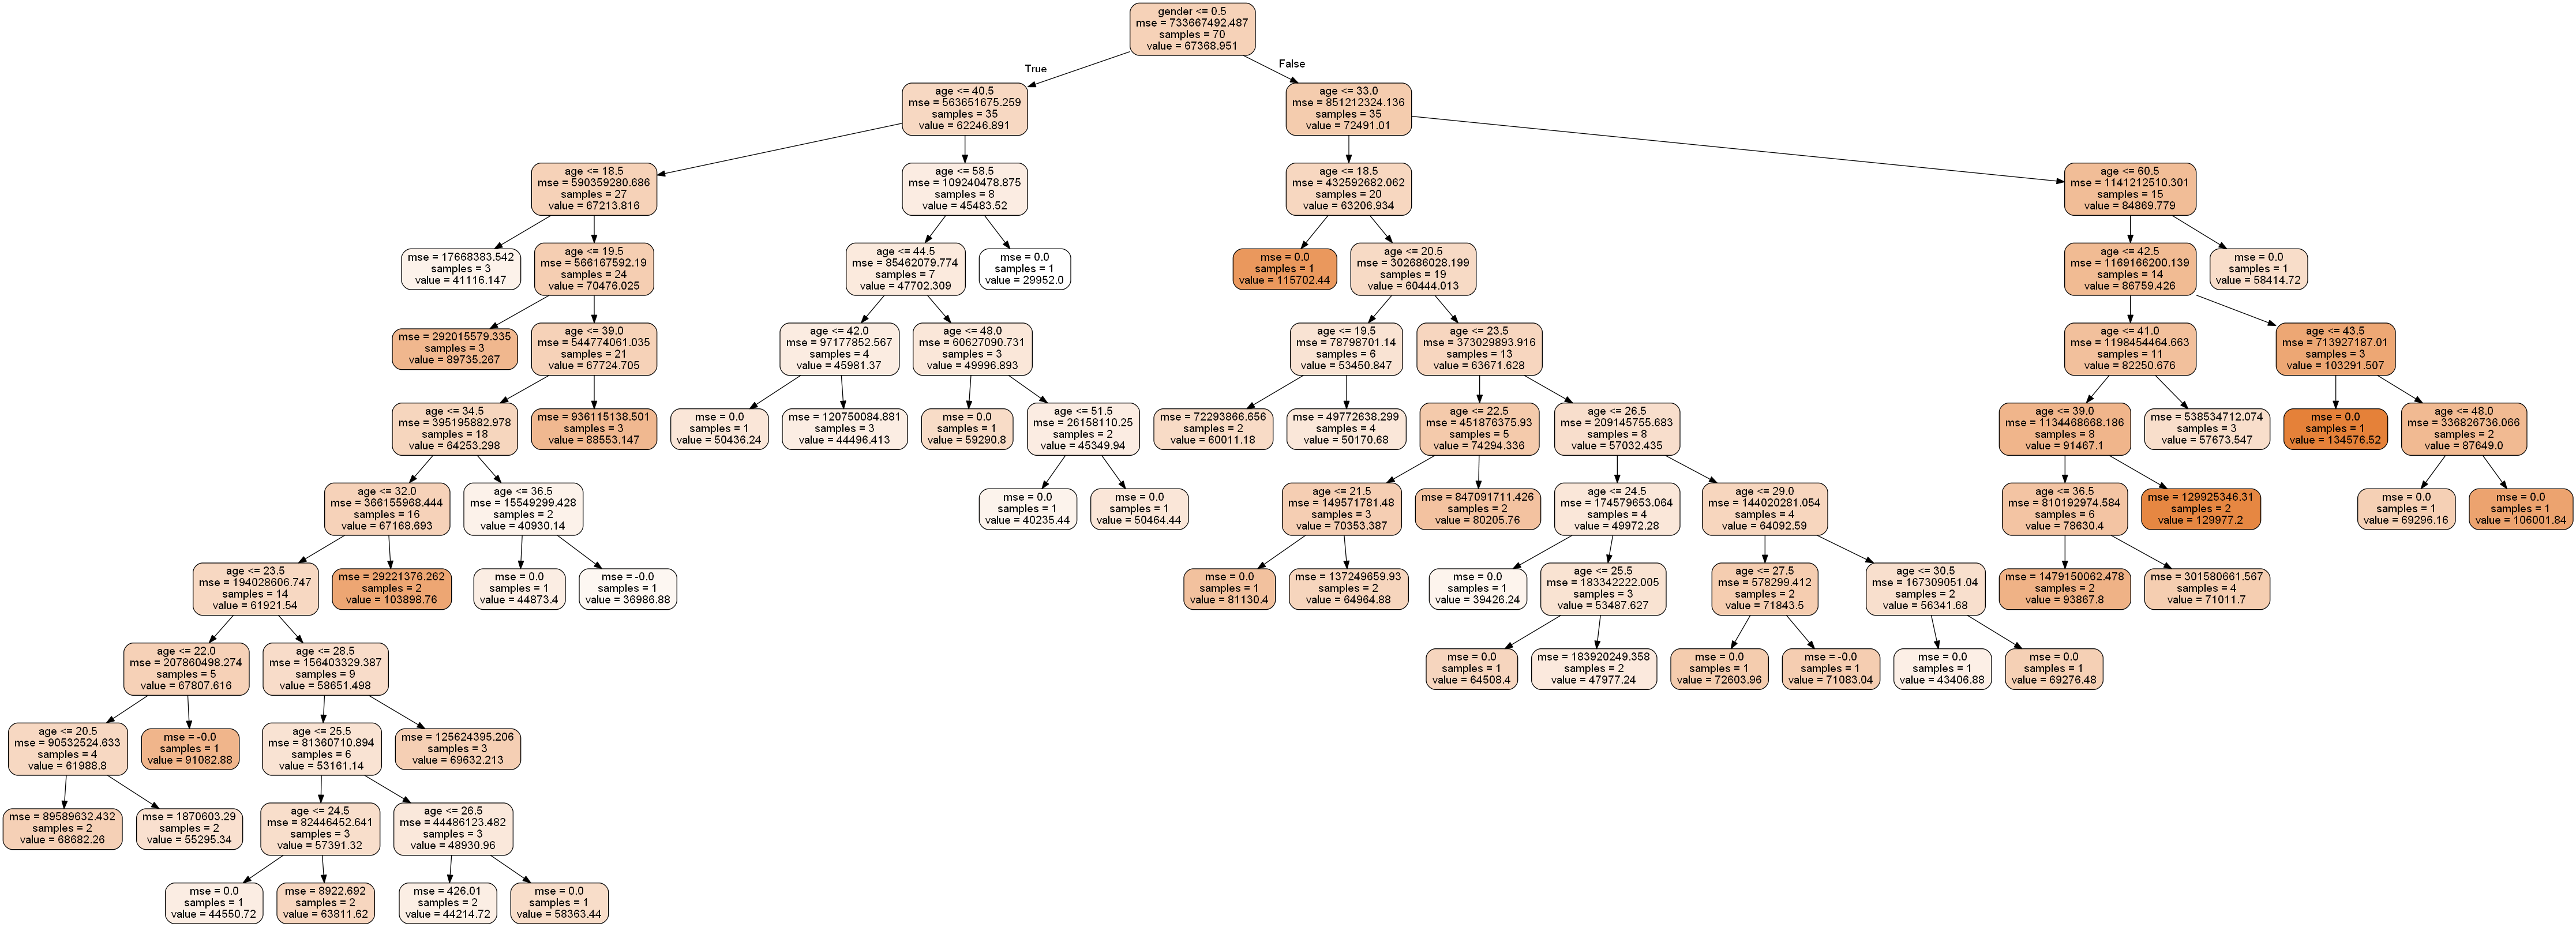

In [47]:
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())